# Importing Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [2]:
data=pd.read_csv('S&P500_Stock_Data.csv',delimiter=',')

In [4]:
data.head()

,Interest Rates,Employment,S&P 500 Price
0,1.943859,55.413571,2206.680582
1,2.258229,59.546305,2486.474488
2,2.215863,57.414687,2405.868337
3,1.977960,49.908353,2140.434475
4,2.437723,52.035492,2411.275663


In [5]:
data.describe()

,Interest Rates,Employment,S&P 500 Price
count,1000.000000,1000.000000,1000.000000
mean,2.195392,56.254855,2319.999936
std,0.241630,4.862178,193.854745
min,1.500000,40.000000,1800.000000
25%,2.035735,53.029784,2190.447901
50%,2.198214,56.160941,2312.443024
75%,2.359061,59.422633,2455.764327
max,3.000000,70.000000,3000.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Interest Rates  1000 non-null   float64
 1   Employment      1000 non-null   float64
 2   S&P 500 Price   1000 non-null   float64
dtypes: float64(3)
memory usage: 23.5 KB


# Visualising Data

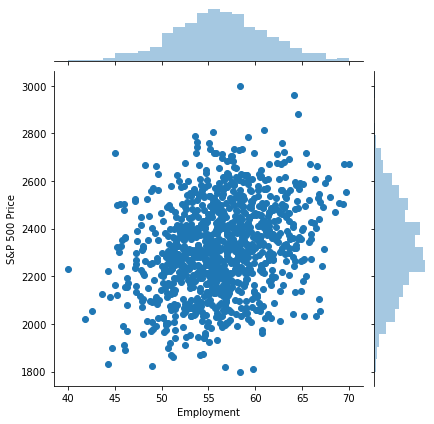

In [9]:
sns.jointplot(x='Employment',y='S&P 500 Price',data=data)

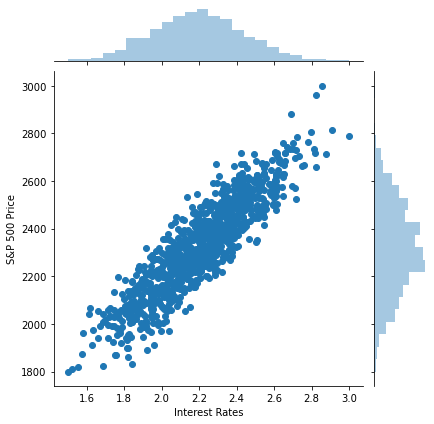

In [10]:
sns.jointplot(x='Interest Rates',y='S&P 500 Price',data=data)

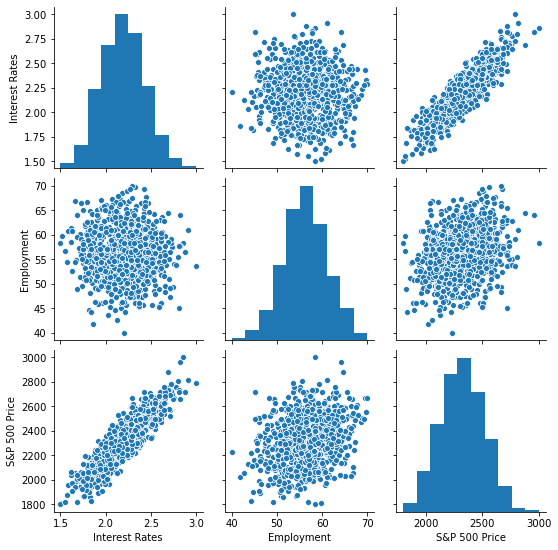

In [11]:
sns.pairplot(data)

# Dividing Data

In [92]:
x=data[['Interest Rates','Employment']]
y=data['S&P 500 Price']

In [93]:
x=np.array(x)
y=np.array(y)

In [94]:
x.shape

(1000, 2)

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3)

In [97]:
x_train.shape


(700, 2)

In [98]:
y_train.shape

(700,)

In [99]:
x_test.shape

(300, 2)

# Training Data

In [100]:
from sklearn.linear_model import LinearRegression

In [101]:
regressor=LinearRegression(fit_intercept=True)

In [102]:
regressor.fit(x_train,y_train)

LinearRegression()

In [103]:
print("The model coeffcient (m): ",regressor.coef_)
print('The model coefficient (b): ',regressor.intercept_)

The model coeffcient (m):  [731.04444296  12.62518556]
The model coefficient (b):  4.38609987484233


In [104]:
y_pred=regressor.predict(x_test)

Text(0, 0.5, 'True Values')

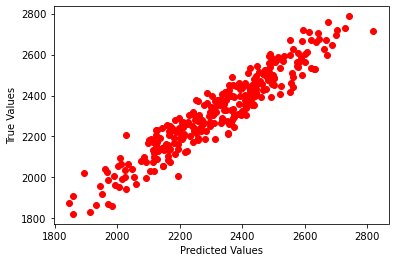

In [105]:
plt.scatter(y_pred,y_test,color='r')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')

In [106]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [107]:
from math import sqrt

In [108]:
n=len(x_test)

In [109]:
k=x_test.shape[1]

In [110]:
k

2

In [111]:
RMSE=float(format(np.sqrt(mean_squared_error(y_test,y_pred)),'.3f'))
MSE=mean_squared_error(y_test,y_pred)
MAE=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
adj_r2=1-(1-r2)*(n-1)/(n-k-1)

In [112]:
print('rmse',RMSE)
print('MSE: ',MSE)
print('MAE: ',MAE)
print('R2: ',r2)
print('ajd_r2: ',adj_r2)

rmse 62.327
MSE:  3884.6018632484524
MAE:  51.069878676571754
R2:  0.8974978710233367
ajd_r2:  0.8968076209965578


# Visualising Data

In [113]:
from mpl_toolkits.mplot3d import Axes3D

In [114]:
x_surf,y_surf=np.meshgrid(np.linspace(data["Interest Rates"].min(),data["Interest Rates"].max(),100),np.linspace(data["Employment"].min(),data["Employment"].max(),100))

In [115]:
x_surf.shape

(100, 100)

In [116]:
only_x=pd.DataFrame({'Interest Rates':x_surf.ravel(),'Employment':y_surf.ravel()})

In [117]:
only_x.shape

(10000, 2)

In [122]:
fitted_y=regressor.predict(only_x)

In [123]:
fitted_y.shape

(10000,)

In [124]:
fitted_y=fitted_y.reshape(x_surf.shape)

In [125]:
fitted_y.shape

(100, 100)

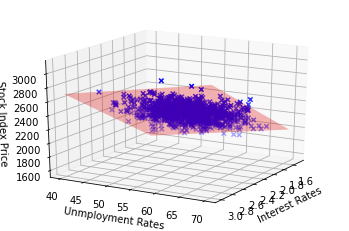

In [138]:
fig=plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(data['Interest Rates'],data['Employment'],data['S&P 500 Price'],c='b',marker='x')
ax.plot_surface(x_surf,y_surf,fitted_y,color='red',alpha=.3)
ax.set_xlabel('Interest Rates')
ax.set_ylabel('Unmployment Rates')
ax.set_zlabel('Stock Index Price')
ax.view_init(20,30)